# TAREA FOURIER

### NOMBRE: Federico Parejea Gómez / C.C: 1053840480
### CURSO: Programación para Ingenieria - Maestria en Ingenieria

Declaración librerias

In [10]:
import numpy as np #Llamamos la libreria para utilizar erramientas matematicas y tambien creación de vectores y matrices
from scipy import integrate # importamos de la libreria scipy un algoritmo de intergración que se utilizara mas adelante.
import matplotlib.pyplot as plt # De la libreria de matplotlib importamos con el indicativo de plt, para usar la herramienta de graficación
import sympy as sym # se importa la libreria sympy para trabajar matematica simbolica lo reducimos como sym, para mejor manejo en el codio siguinete.

# función magica para configurar matplotlib para que funcione de forma interactiva.
%matplotlib inline 

Variable simbolicas n y t

In [2]:
n = sym.Symbol('n') # creación de variable simbolica n
t = sym.Symbol('t') # Creación de variable simbolica t

Funcion periodica por tramos

In [3]:
Tmin = -3 # Se declara los limites donde se van a representar en el eje X. 
Tmax = 3

T=Tmax-Tmin
print('Valor de T es=',T)
w=2*np.pi/T
print('Valor de w0 es=', w)

Valor de T es= 6
Valor de w0 es= 1.0471975511965976


Defino las funcion a trozos

In [4]:
f1=-1
f2=1
f3=-1

ft =sym.Piecewise((f1, ((t >= -T/2) & (t <= -T/4))), (f2, ((t > -T/4) & (t <= T/4))), (f3, ((t > T/4) & (t <= T/2))))
ft

Piecewise((-1, (t >= -3.0) & (t <= -1.5)), (1, (t <= 1.5) & (t > -1.5)), (-1, (t <= 3.0) & (t > 1.5)))

Calcular los coeficientes de fourier

In [5]:
# Calculo integral para a0
f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("a0 = ")
sym.pprint(a0)

# Calculo integral para an
f_integral = ft*sym.cos(n*w*t)
an = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an = sym.simplify(an)
print("an = ")
sym.pprint(an)

# Calculo la integral para bn
f_integral = ft*sym.sin(n*w*t)
bn = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("bn = ")
bn = sym.simplify(bn)
sym.pprint(bn)

a0 = 
0
an = 
⎧1.27323954473516⋅sin(1.5707963267949⋅n) - 0.636619772367581⋅sin(3.14159265358
⎪─────────────────────────────────────────────────────────────────────────────
⎨                                         n                                   
⎪                                                                             
⎩                                         0                                   

979⋅n)                                                                        
──────  for (n > -∞ ∨ n > 0) ∧ (n > -∞ ∨ n < ∞) ∧ (n > 0 ∨ n < 0) ∧ (n < 0 ∨ n
                                                                              
                                                                              
                                         otherwise                            

     
 < ∞)
     
     
     
bn = 
0


Representación expanción de fourier

In [9]:
# Definimos el número de armónicos para la expansión
serie = 0
Armonicos = 8

for i in range(1,Armonicos+1):
    
    # Evaluamos los coeficientes para cada armónico
    an_c = an.subs(n,i)
    bn_c = bn.subs(n,i)
    
    if abs(an_c) < 0.0001: an_c = 0
    if abs(bn_c) < 0.0001: bn_c = 0
        
    serie= serie + an_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bn_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie

print('f(t)= ')
sym.pprint(serie)

f(t)= 
1.27323954473516⋅cos(1.0471975511966⋅t) - 0.424413181578388⋅cos(3.141592653589
79⋅t) + 0.254647908947032⋅cos(5.23598775598299⋅t) - 0.181891363533595⋅cos(7.33
038285837618⋅t)


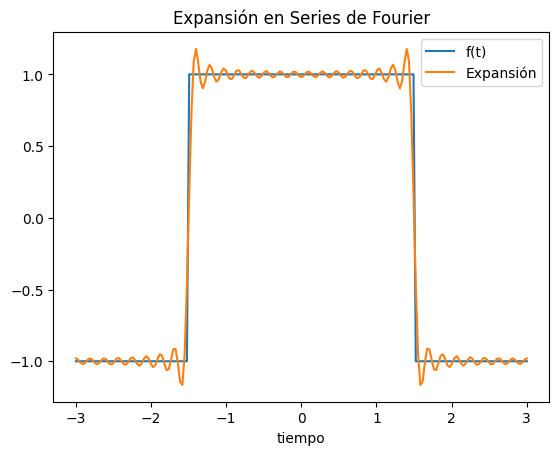

In [8]:
# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,ft)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tmax,200)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)
 
plt.plot(v_tiempo,fG,label = 'f(t)')
plt.plot(v_tiempo,fserieG,label = 'Expansión')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()# 